Привет! Ты теперь находишься на территории код-ревьюеров. У нас тут своя атмосфера и правила:  
1. Меня зовут Алексей Свирин.  
2. Общаемся на ты.  
3. Хочешь мне написать — пиши. Только нужно выбрать свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку, но все остальное как в жизни, может быть сложно.  
5. У тебя бесконечное количество ~~жизней~~ попыток для сдачи проекта.  
6. Поехали!  

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера №1

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №1


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №1

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>

---

<div class="alert alert-block alert-info">
    

### Комментарий от ревьюера №1

К сожалению, в самом начале столкнулся с технической проблемой в проекте. Оставил комментарий только по А/Б-тесту.
</div>

<div class="alert alert-block alert-info">
    

### Комментарий от ревьюера №2

Проверил проект до конца, есть еще задания на которые нужно обратить внимание, в А/Б-тесте следует поменять порядок сравнения событий.
</div>

<div class="alert alert-block alert-info">
    

### Комментарий от ревьюера №3

Проект принят. В целом проект сделан хорошо, А/Б-тест проведен отлично, воронка найдена правильно. Ты классно строишь графики, я тебе оставил комментарий про график funnel и что с ним можно было сделать. Также оставил комментарий про самое последнее задание про количество проверок и дал несколько полезных ссылок к чему в целом это задание было. Выводы сделаны правильные, также хорошо, что посмотрела подробнее на период удаляемых данных, попробуй обращать внимание на такие детали, это бывает очень важно и ты можешь найти что-то неизвестное в данных.
    
Поздравляю с окончанием второго модуля!
</div>

# Сборный проект 2. "Анализ поведения пользователей мобильного приложения по доставке продуктов питания"

Проект посвящен анализу поведения пользователей мобильного приложения, в котором продаются продукты питания. Необходимо изучить воронку продаж. Узнать, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно? Также предполагается проведение A/A/B-теста, который должен показать целеообразность изменеия шрифтов во всем приложении.

**План работы:**
1. [Изучить общую информацию о данных;](#start)
2. [Предобраобработка данных](#pre_processing)
3. [Изучение и проверка данных;](#research_analysis)
     - [количество событий в логе;](#count_events)    
     - [количество пользователие в логе;](#count_users)
     - [среднее количество событий на пользователя;](#mean_events)
     - [проверка полноты данных за период, графики](#analazed_period)
     - [проверка исключений](#checking)
     - [проверка наличия пользователей экпериментальных групп](#experimen_group)
4. [Анализ воронки событий](#event_funnel)
     - [оценка частоты событий в логах](#event_log)
     - [анализ событий в разрезе пользователей](#event_users)
     - [анализ цепочки событий](#chain_of_events)
     - [построение воронки событий](#conversion)
5. [А/А/В эксперимент](#experiment)
     - [подсчет количества пользователей в каждой экприментальной группе](#cont_group)
     - [оценка статистической значимости между контрольными группы для А/А-эксперимента](#A_A)
     - [оценка самого популярного события в разных группах](#popular_event)
     - [A/B тест](#A_B)
6. [Вывод](#resume)

**Описание данных:**
      - Таблица logs_exp:
        - EventName — название события;
        - DeviceIDHash —  уникальный идентификатор пользователя;
        - EventTimestamp — время события;
        - ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.
        
   
 Данные содержатся в csv файле  /datasets/logs_exp.csv  

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №1

Хорошое начало с описанием интерактивным меню.
</div>

## 1. Изучение общей информации <a id="start"> </a>

In [1]:
import pandas as pd # <импорт библиотеки pandas>

import matplotlib.pylab as plt # <импорт библиотеки matplotlib>
import numpy as np # <импорт библиотеки numpy>
import seaborn as sns #<импорт библиотеки seaborn>
import scipy.stats as st  # <импорт scipy.stats>
from IPython.display import display# <импорт метода display из библиотеки IPython.display для просмотра таблиц>
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
import pylab as pl
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
import re
from datetime import datetime, date, time
import math as mth
from pandas.plotting import register_matplotlib_converters

In [2]:
path = '/datasets/'

Прочитаем файл logs_exp.csv

In [3]:
logs_exp = pd.read_csv(path + 'logs_exp.csv', sep='\t')
 # <чтение файла с данными с сохранением их в переменной logs_exp, с указанием разделителя>

Посмотрим таблицу logs_exp, выведем ее на экран

In [4]:
display(logs_exp)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


Данные в столбце EventTimestamp отобразились в формате unix time

Посмотрим общую информацию о таблице

In [5]:
logs_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №1

Дальше идет техническая ошибка — KeyError: 'ExpId'
</div>

> **<span style="color:orange">Когда меняла путь к файлу стерла разделитель... поэтому файл не открылся, исправила</span>**
>

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №2

👍
</div>

In [6]:
logs_exp['ExpId'].unique()

array([246, 248, 247])

Таблица содержит 4 столбца и 244126 строк, пропущенные значения отсутствуют, неверно указан тип данных столбца EventTimestamp содержащшего информацию о дате и времени события. Информация в столбце ExpId указана верно (в нем должно быть 3 уникальных номера экспериментальных групп). Названия столбцов необходимо открректировать.

## Вывод

В данных отсутствуют пропущенные значения, это хорошо - данные полные, но они нуждаются в предобработке - необходимо изменить названия столбцов и тип данных EventTimestamp привести к datatime

## 2. Предобработка данных <a id="pre_processing"> </a>

Изменим названия столбцов, для этого передадим новый спискок имен

In [7]:
logs_exp.columns = ['event_name','user_id', 'event_date_time', 'exp_id']

Изменим тип данных столбца event_date на datetime

In [8]:
logs_exp['event_date_time'] = pd.to_datetime(logs_exp['event_date_time'], unit='s')#<изменение типа данных на datetime>

In [9]:
logs_exp

,event_name,user_id,event_date_time,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246


Добавим столбец даты и времени

In [10]:
logs_exp['event_date']= logs_exp['event_date_time'].dt.date
logs_exp['event_time']= logs_exp['event_date_time'].dt.time
logs_exp['hour'] = logs_exp['event_date_time'].dt.hour
logs_exp['event_date'] = pd.to_datetime(logs_exp['event_date'])
                                 

In [11]:
logs_exp

,event_name,user_id,event_date_time,exp_id,event_date,event_time,hour
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,04:43:36,4
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11:11:42,11
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47,11
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47,11
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11:48:42,11
...,...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,21:12:25,21
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,21:13:59,21
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,21:14:43,21
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,21:14:58,21


In [12]:
logs_exp['event_name'].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

Проверим данные на дубликаты:

In [13]:
print('количество дубликатов в таблице logs_exp:', logs_exp.duplicated().sum())

количество дубликатов в таблице logs_exp: 413


удалим дубликаты

In [14]:
logs_exp = logs_exp.drop_duplicates()

## Вывод

Выполнили предобработку, изменили тип данных столбца event_date_time, удалили дубликаты поправили названия столбцов, добавили два стоблца содержащих отдельно дату и время события.

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №2

Проверь, пожалуйста, данные на дубликаты.
</div>

> **<span style="color:orange">Дубликаты удалила</span>**
>

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №3

👍
</div>

## 3. Изучение и проверка данных <a id="research_analysis"> </a>

### 3.1 Количество событий в логе<a id="count_events"> </a>


Посчитаем количество уникальных событий в логе

In [15]:
logs_exp['event_name'].nunique()

5

In [16]:
logs_exp['event_name'].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

В логе 5 уникальных событий: пользователь зашел на главный экран, посмотрел обучающую инструкцию, посмотрел предложения, перешел в корзину, совешил оплату

In [17]:
unique_events_count = logs_exp.pivot_table(index= 'event_name', values='user_id', aggfunc='count') \
                    .reset_index() \
                    .rename(columns={'user_id':'count_event'}) \
                    .sort_values(by='count_event', ascending=False)
unique_events_count                  

,event_name,count_event
1,MainScreenAppear,119101
2,OffersScreenAppear,46808
0,CartScreenAppear,42668
3,PaymentScreenSuccessful,34118
4,Tutorial,1018


In [18]:
count_events = sum(unique_events_count['count_event'])
print('общее количество событий:', count_events)

общее количество событий: 243713


Видим, что в таблице 119101 событий просмотров главного экрана, 46808 событий просмотра предложений, 42668 событий перехода в корзину, 34118 событий успешной оплаты, 1018 событий просмотра инструкции. Общее количество событий составляет 243713

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №2

Тут всё отлично.
</div>

### 3.2 Количество пользователей в логе<a id="count_users"> </a>

In [19]:
count_users = logs_exp['user_id'].nunique()

In [20]:
print('Количество уникальных пользователей в логе:', count_users)

Количество уникальных пользователей в логе: 7551


Посчитаем также количество уникальных пользователей по каждому уникальному событию

In [21]:
count_unique_user = logs_exp.groupby('event_name').agg({'user_id': 'nunique'}).reset_index() \
                                .rename(columns={'user_id':'count_unique_users'})
count_unique_user

,event_name,count_unique_users
0,CartScreenAppear,3749
1,MainScreenAppear,7439
2,OffersScreenAppear,4613
3,PaymentScreenSuccessful,3547
4,Tutorial,847


7551 человек совершали какие-либо действия в приложении

### 3.3 Среднее количество событий на пользователя<a id="mean_events"> </a> 

Разделим общее количество всех событий на количество уникальных пользователей

In [22]:
count_per_user = (count_events / count_users)
count_per_user

32.27559263673685

В среднем на одного пользователя приходится 32 события.

Посмотрим на распределение количества событий по пользователям и посчитаем медиану и моду

In [23]:
user_gr = logs_exp.groupby('user_id').agg({'event_name': 'count'}).reset_index()
                               # .rename(columns={'event_name':'count_events'}
user_gr.sort_values(by='event_name', ascending=False).head(20)

,user_id,event_name
5116,6304868067479728361,2307
147,197027893265565660,1998
3714,4623191541214045580,1768
5590,6932517045703054087,1439
1391,1754140665440434215,1221
2641,3337471580007169353,1186
6294,7738058666231999878,888
822,1055544042902443290,854
3801,4713748699910253089,824
6617,8118046800480174342,755


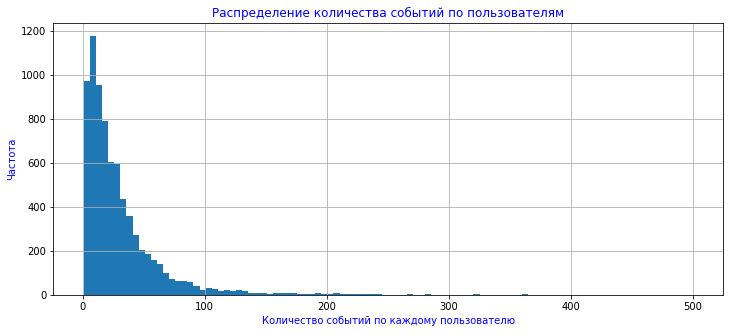

In [24]:
plt.figure(figsize=(12,5))
pd.Series(user_gr['event_name']).hist(bins=100, range = (1, 500))
plt.title('Распределение количества событий по пользователям', fontsize=12, color='blue')
plt.xlabel('Количество событий по каждому пользователю', fontsize=10, color='blue')
plt.ylabel('Частота', fontsize=10, color='blue')
plt.show()

In [25]:
print('медиана', user_gr['event_name'].median())
print('мода', user_gr['event_name'].mode())

медиана 20.0
мода 0    5
dtype: int64


Гистограмма распределения имеет высокий пик и очень длинный хвост, поскольку есть пользователи с количеством событий свыше 500 и даже свыше 1000, поэтому среднее плохо описывает данное распределение, в данном случае при наличии большого количества выбросов медиана не так сильно будет искажаться и лучше опишет распределение, посчитаем ее.

Получаем, что обычно пользователи совершали по 20 событий за указанный период.

Посмотрим на количество событий на пользователя в разрезе видов событий, для этого объединим таблицы unique_evens_count и count_unique_user по полю event_name и добавим столбец  count_per_user

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №1

В этом моменте можно было еще посмотреть на медиану и моду. И сделать вывод о распределении наших данных.

</div>

> **<span style="color:orange">Построила график распределения, посчитала медиану и моду</span>**
>

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №3

Отлично!
</div>

In [26]:
event_per_user = pd.merge(unique_events_count, count_unique_user, on='event_name',how='outer')
event_per_user['count_event_per_user'] = event_per_user['count_event'] / event_per_user['count_unique_users'] 
event_per_user

,event_name,count_event,count_unique_users,count_event_per_user
0,MainScreenAppear,119101,7439,16.010351
1,OffersScreenAppear,46808,4613,10.146976
2,CartScreenAppear,42668,3749,11.381168
3,PaymentScreenSuccessful,34118,3547,9.618833
4,Tutorial,1018,847,1.201889


В среднем 16 раз пользователь открывает главный экран, 10 раз просматривает предложения, 11 раз кладет товар в корзину, 9 раз успешно оплачивает товар и 1 раз смотрит инструкцию. Странно, среднее количество событий товар в корзине больше чем среднее количество события просмотр предложения, видимо в данных есть какой-то перекос, рассмотрим подробнее дальше.

### 3.4 Проверка полноты данных за период <a id="analazed_period"> </a> 

Посмотрим за какой период имеются данные в логах, рассчитаем мin и max значение даты

In [27]:
print('период с', min(logs_exp['event_date']), 'по', max(logs_exp['event_date']))

период с 2019-07-25 00:00:00 по 2019-08-07 00:00:00


Мы располагаем данными логов за две недели с 25 июля по 7 августа 2019 года

In [28]:
logs_exp.sort_values(by='event_date')

,event_name,user_id,event_date_time,exp_id,event_date,event_time,hour
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,04:43:36,4
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11:11:42,11
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47,11
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47,11
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11:48:42,11
...,...,...,...,...,...,...,...
223350,MainScreenAppear,1599641448679221409,2019-08-07 10:13:46,247,2019-08-07,10:13:46,10
223349,MainScreenAppear,6713384618608633696,2019-08-07 10:13:44,247,2019-08-07,10:13:44,10
223348,MainScreenAppear,3063248032210795834,2019-08-07 10:13:41,247,2019-08-07,10:13:41,10
223376,MainScreenAppear,6953415790057009349,2019-08-07 10:14:36,248,2019-08-07,10:14:36,10


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



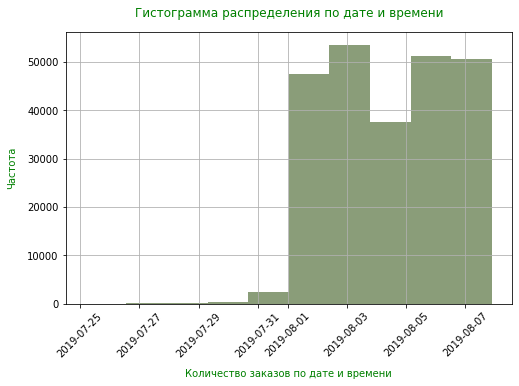

In [29]:
plt.figure(figsize=(8, 5))
plt.hist(logs_exp['event_date_time'], color='#8a9d79')
plt.title('Гистограмма распределения по дате и времени', fontsize=12, color='green', pad = 15)
plt.xlabel('Количество заказов по дате и времени', fontsize=10, color='green', labelpad=10)
plt.ylabel('Частота', fontsize=10, color='green', labelpad=10)
plt.xticks(rotation = 45)
plt.grid()
plt.show()

Сделаем срез из таблицы за 31.07.2019 и посмотрим гистограмму по часам

In [30]:
logs_exp_31 = logs_exp[logs_exp['event_date'] == "2019-07-31"]
logs_exp_31

,event_name,user_id,event_date_time,exp_id,event_date,event_time,hour
797,MainScreenAppear,3670880358399219515,2019-07-31 01:11:46,247,2019-07-31,01:11:46,1
798,OffersScreenAppear,3799109751993694887,2019-07-31 01:21:04,248,2019-07-31,01:21:04,1
799,Tutorial,1126021718529336913,2019-07-31 01:32:11,247,2019-07-31,01:32:11,1
800,MainScreenAppear,4293428370257583636,2019-07-31 02:19:18,248,2019-07-31,02:19:18,2
801,MainScreenAppear,4567464647598975872,2019-07-31 02:33:30,247,2019-07-31,02:33:30,2
...,...,...,...,...,...,...,...
2823,OffersScreenAppear,2413191300976302222,2019-07-31 23:54:55,247,2019-07-31,23:54:55,23
2824,MainScreenAppear,5505110279185484837,2019-07-31 23:57:30,247,2019-07-31,23:57:30,23
2825,MainScreenAppear,5505110279185484837,2019-07-31 23:57:42,247,2019-07-31,23:57:42,23
2826,MainScreenAppear,5505110279185484837,2019-07-31 23:57:52,247,2019-07-31,23:57:52,23


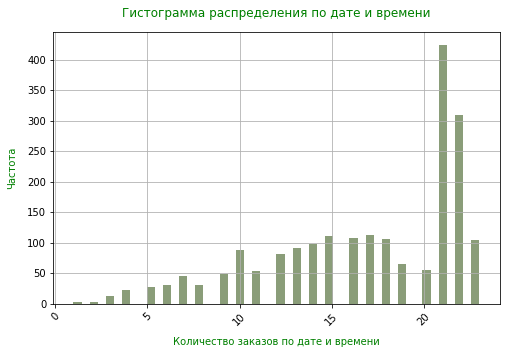

In [31]:
plt.figure(figsize=(8, 5))
plt.hist(logs_exp_31['hour'], bins=50, color='#8a9d79')
plt.title('Гистограмма распределения по дате и времени', fontsize=12, color='green', pad = 15)
plt.xlabel('Количество заказов по дате и времени', fontsize=10, color='green', labelpad=10)
plt.ylabel('Частота', fontsize=10, color='green', labelpad=10)
pl.xticks(rotation = 45)
plt.grid()
plt.show()

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №2

Обрати внимание на предупреждение, его можно убрать, добавив вот эти строки:
    
- from pandas.plotting import register_matplotlib_converters
- register_matplotlib_converters()
    
Сейчас график строится и без них, но в обновленных версиях matplotlib скорее всего без этого не обойтись.
</div>

Получается, что данные не одинаково полные за весь период, вероятно в первую неделю с 25 июля по 31 июля у нас в логи 'доезжают события' из прошлого периода, полные данные начинают формироваться с 21 часа 31.07.2019, в связи с этим сделаем срез и отбросим данные до 21:00 31.07.2019, сохраним в новую таблицу logs_filtered

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №2

Всё правильно, но тут можно было бы посмотреть по часам когда начался наш эксперимент. 
</div>

> **<span style="color:orange">Поправила, посмотрела по часам, пришла к выводу, что нужно делать срез начиная с 21:00 31.07.2019</span>**
>

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №3

👍
</div>

In [32]:
logs_filtered = logs_exp.query('event_date_time >= "2019-07-31 21:00:00"')
logs_filtered

,event_name,user_id,event_date_time,exp_id,event_date,event_time,hour
1990,MainScreenAppear,7701922487875823903,2019-07-31 21:00:57,247,2019-07-31,21:00:57,21
1991,MainScreenAppear,2539077412200498909,2019-07-31 21:01:45,247,2019-07-31,21:01:45,21
1992,OffersScreenAppear,3286987355161301427,2019-07-31 21:02:21,248,2019-07-31,21:02:21,21
1993,OffersScreenAppear,3187166762535343300,2019-07-31 21:02:23,247,2019-07-31,21:02:23,21
1994,MainScreenAppear,1118952406011435924,2019-07-31 21:03:25,248,2019-07-31,21:03:25,21
...,...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,21:12:25,21
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,21:13:59,21
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,21:14:43,21
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,21:14:58,21


Посмотрим насколько сократилась таблица с логами

In [33]:
print('из таблицы исключили', logs_exp.shape[0]-logs_filtered.shape[0], 'записей')

из таблицы исключили 1989 записей


In [34]:
unique_users_new = logs_filtered['user_id'].nunique()
print('из таблицы исключили:', count_users - unique_users_new, 'пользователей')

из таблицы исключили: 13 пользователей


Итого, отбросив старые данные, мы исключили 1989 записей по 13 пользователям.

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №2

Всё верно, молодец, еще тут можно было бы посмотреть какую долю от наших данных это составляет.
</div>

> **<span style="color:orange">уменьшилось количество исключенных записей</span>**
>

### 3.5  Проверка наличия пользователей экпериментальных групп<a id="experimen_group"> </a>

Убедимся, что после исключения записей, у нас остались пользователи по всем экспериментальным группам, сделаем группировку по группе эксперимента с подсчетом пользователей

In [35]:
count_user_gr = logs_filtered.groupby('exp_id').agg({'user_id': 'nunique'}).reset_index() \
                                .rename(columns={'user_id':'count_users_exp'})
count_user_gr

,exp_id,count_users_exp
0,246,2484
1,247,2517
2,248,2537


После исключения записей, в выборке присутствуют пользователи всех трех экпериментальных групп, в группе 246 - 2484 пользователя, в группе 247 - 2517 и в группе 248 - 2537 пользователей

In [36]:
event_per_user

,event_name,count_event,count_unique_users,count_event_per_user
0,MainScreenAppear,119101,7439,16.010351
1,OffersScreenAppear,46808,4613,10.146976
2,CartScreenAppear,42668,3749,11.381168
3,PaymentScreenSuccessful,34118,3547,9.618833
4,Tutorial,1018,847,1.201889


## Вывод

    В логах 5 уникальных событий:  
    - 119101 событий просмотров главного экрана, 
    - 46808 событий просмотра предложений, 
    - 42668 событий перехода в корзину, 
    - 34118 событий успешной оплаты, 
    - 1018 событий просмотра инструкции. 
    - Общее количество событий составляет 244126.
    7551 уникальных пользователей совершали какие-либо действия в приложении. В среднем на одного пользователя приходится 32 события, при этом:
    - в среднем 16 раз пользователь открывает главный экран, 
    - 10 раз просматривает предложения, 
    - 11 раз кладет товар в корзину, 
    - 9 раз успешно оплачивает товар,
    - 1 раз смотрит инструкцию. 
    Можно заметить, что среднее количество событий - товар в корзине больше чем среднее количество события просмотр предложения, видимо в данных есть какой-то перекос, что подтверждается распределением событий по датам и времени. 
    Мы располагаем данными логов за две недели с 25 июля по 7 августа 2019 года. Данные не одинаково полные за весь период, есть перекос, вероятно в первую неделю с 25 июля по 31 июля в логи 'доезжают события' из прошлого периода, полные данные начинают формироваться с 21 часа 31.07.2019, поэтому мы отбросили данные до 01.08.2019. Структурно, были исключены 2828 записей по 17 пользователям. Мы убедились, что после исключения записей, в выборке присутствуют пользователи всех трех экпериментальных групп, в группе 246 - 2484 пользователя, в группе 247 - 2517 и в группк 248 - 2537 пользователей.

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №2

Данный раздел сделан хорошо!
</div>

## 4. Анализ воронки событий <a id="event_funnel"> </a> 

### 4.1 Оценка частоты событий в логах <a id="event_log"> </a>

Посмотрим частоту разных событий по отфильтрованым логам

In [37]:
count_events = logs_filtered.groupby('event_name').agg({'user_id': 'count'}) \
                                .rename(columns={'user_id':'count_event'}) \
                                .sort_values(by='count_event', ascending=False) \
                                .reset_index()
count_events

,event_name,count_event
0,MainScreenAppear,117889
1,OffersScreenAppear,46531
2,CartScreenAppear,42343
3,PaymentScreenSuccessful,33951
4,Tutorial,1010


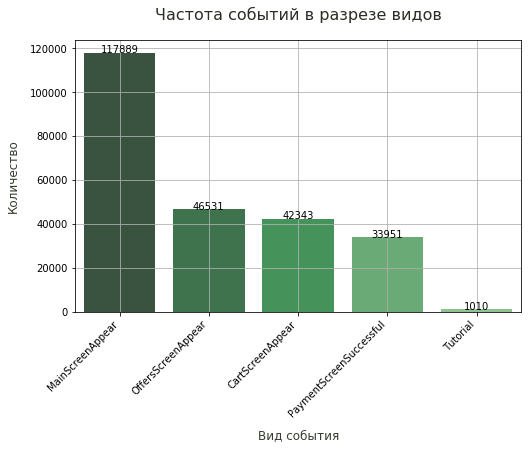

In [38]:
plt.figure(figsize=(8, 5))
pal = sns.color_palette("Greens_d", len(count_events))
rank = count_events["count_event"].argsort().argsort() 
g=sns.barplot(x="event_name", y="count_event", data=count_events, palette=np.array(pal[::-1])[rank])
sns.set_style('darkgrid')

plt.title('Частота событий в разрезе видов', fontsize=16, color='#292f24', pad = 20)
plt.xlabel('Вид события', fontsize=12, color='#373e30', labelpad=10)
plt.ylabel('Количество', fontsize=12, color='#373e30', labelpad=10)
plt.xticks(rotation=45, ha='right')
for index, row in count_events.iterrows():
    g.text(row.name,row.count_event, round(row.count_event,2), color='black', ha="center")
plt.grid()
plt.show()

Чаще всего встречается событие просмотр главного экрана - 117889 раз, затем просмотр предложений - 46531, потом товар кладут в корзину 42343 раз, успешная оплата товара - 33951 и просмотр инструкции 1010 событий

### 4.2 Анализ событий в разрезе пользователей <a id="event_users"> </a>

Посчитаем сколько пользователей совершали каждое из этих событий

In [39]:
count_user_filt = logs_filtered.groupby('event_name').agg({'user_id': 'nunique'}).reset_index() \
                                .rename(columns={'user_id':'count_users'})
count_user_filt

,event_name,count_users
0,CartScreenAppear,3736
1,MainScreenAppear,7423
2,OffersScreenAppear,4597
3,PaymentScreenSuccessful,3540
4,Tutorial,843


Объединим таблицы count_events и count_user_filt и посчитаем долю пользователей, которые хоть раз совершали какое-либо событие, для этого число уникальных пользователей каждого события разделим на общее число уникальных пользователей отфильтрованной выборки

In [40]:
event_per_user_filt = pd.merge(count_events, count_user_filt, on='event_name',how='outer') #объединяем таблицы
event_per_user_filt['ratio'] = (event_per_user_filt['count_users'] / unique_users_new * 100).round(2) #считаем долю пользователей
event_per_user_filt

,event_name,count_event,count_users,ratio
0,MainScreenAppear,117889,7423,98.47
1,OffersScreenAppear,46531,4597,60.98
2,CartScreenAppear,42343,3736,49.56
3,PaymentScreenSuccessful,33951,3540,46.96
4,Tutorial,1010,843,11.18


<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера #2

Можешь предположить почему на главную приходит только 98,5% пользователей? Этот экран вроде нельзя пропустить в приложении.
</div>

> **<span style="color:orange">Можно предположить, что некоторые пользователи сразу заходят по ссылке на конкретный товар, отправленной к примеру другом</span>**
>

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №2

Эта проблема скорее связана с тем, что ты была отброшена часть событий, которые были в июле, а там пользователи как раз проходили первый этап воронки. А уже в августе у них были новые этапы. Поэтому они считаются в униках, но их нет на первом этапе.
</div>

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера #1

Из-за слишком большого различия в данных, график совсем не читается. Может быть ты построишь специальный график для воронок типа funnel, как ниже, или сделаешь независмые оси?
</div>

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №3

👍
</div>

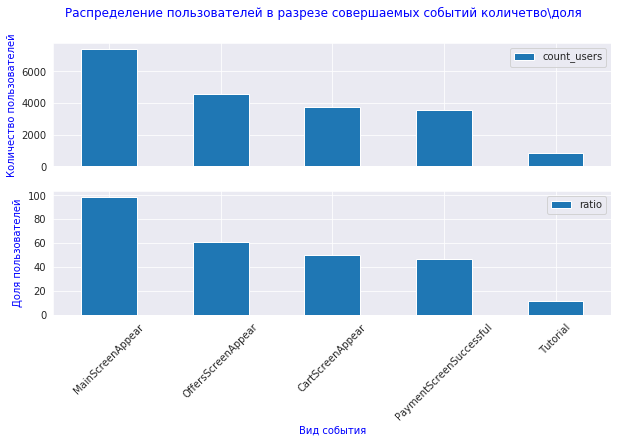

In [41]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5));
fig.suptitle('Распределение пользователей в разрезе совершаемых событий количетво\доля', fontsize=12, color='blue')
event_per_user_filt.plot(x='event_name', y='count_users', kind="bar", sharex=True, ax=axes[0])
event_per_user_filt.plot(x='event_name', y='ratio', kind="bar", ax=axes[1])
axes[0].set_ylabel('Количество пользователей', color='blue')
axes[1].set_ylabel('Доля пользователей', color='blue')
axes[-1].set_xlabel('Вид события', color='blue')
plt.xticks(rotation = 45)
plt.show()


Получаем, что 98,47% пользователей просматривали главный экран, 60,98% просматривали предложения, 49,56% клали товар в корзину, 46,96% оплачивала успешно и 11,18% смотрели инструкцию.

> **<span style="color:orange">изменила график на subplots</span>**
>

### 4.3 Анализ цепочки событий <a id="chain_of_events"> </a> 

Исходя из уже проведенного выше исследования, мы можем предположить следующую последовательную цепочку событий:
    1. Просмотр главного экрана - MainScreenAppear
    2. Просмотр предложений - OffersScreenAppear
    3. Товар в корзине - CartScreenAppear
    4. Успешная оплата заказа - PaymentScreenSuccessful

Событие о просмотре инструкции Tutorial	- нельзя поставить в последовательную цепочку, поскольку это событие может наступить не зависимо от всех остальных, поэтому его не будем учитывать при расчете воронки.

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера #1

Совершенно верно.
</div>

### 4.4 Построение воронки событий <a id="conversion"> </a>

Оставим в таблице все события, кроме просмотра инструкции, сохраним ее под именем event_funnel, добавим столбец conversion, в котором посчитаем отношение количества пользователей на каждом этапе к общему количеству пользователей

In [42]:
event_funnel = event_per_user_filt[0:4]
event_funnel['conversion']=(event_funnel['count_users'] / count_users *100).round(2)
event_funnel

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,event_name,count_event,count_users,ratio,conversion
0,MainScreenAppear,117889,7423,98.47,98.30
1,OffersScreenAppear,46531,4597,60.98,60.88
2,CartScreenAppear,42343,3736,49.56,49.48
3,PaymentScreenSuccessful,33951,3540,46.96,46.88


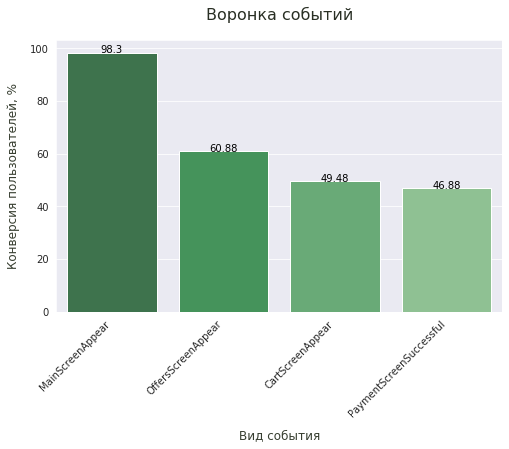

In [43]:
plt.figure(figsize=(8, 5))
pal = sns.color_palette("Greens_d", len(count_events))
rank = event_funnel["conversion"].argsort().argsort() 
g=sns.barplot(x="event_name", y="conversion", data=event_funnel, palette=np.array(pal[::-1])[rank])
sns.set_style('darkgrid')

plt.title('Воронка событий', fontsize=16, color='#292f24', pad = 20)
plt.xlabel('Вид события', fontsize=12, color='#373e30', labelpad=10)
plt.ylabel('Конверсия пользователей, %', fontsize=12, color='#373e30', labelpad=10)
plt.xticks(rotation=45, ha='right')
for index, row in event_funnel.iterrows():
    g.text(row.name,row.conversion, round(row.conversion,2), color='black', ha="center")
plt.show()

Получаем, что из 7551 пользователей,  98,3% просмотрели главный экран, 60,88% перешли на страницу просмотра предложений, затем 49,48% положили товары в корзину и наконец 46,48% пользователей успешно произвели оплату. Можно сделать вывод, что больше всего пользователей теряется на самом первом шаге после просмотра главной страницы, в результате чего только 46,48% пользователей от первого шага доходят до оплаты товаров.

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №1

У тебя неверная информация выводится при наведении на этап воронки в графе ...% of total

</div>

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №1

А как у тебя получилось 18%, если до конца дошло 3539 пользователей их 7419 пользователей?

</div>

> **<span style="color:orange">изменила график на обычный столбчатый, показалось, что так понятнее выглядит воронка</span>**
>

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №3

Чисто для тренировки можно было оставить прошлый график, но изменить несколько параметров выводов информации. Попробуй после проекта, если будет свобдное время, тот тип графика лучше подходит для воронок. Вот тут разбираются варианты вывода информации — https://github.com/plotly/plotly.py/issues/1644
    
Названия при выводе переименовать через hovertemplate, вот тут можно найти информацию в середине – https://plotly.com/python/hover-text-and-formatting/

fig.update_traces(hovertemplate='от всех пользователей: %{percentInitial} <br> от прошлого шага: %{percentPrevious}')
</div>

## Вывод

    Исходя из уже проведенного исследования, мы можем предположить следующую последовательную цепочку событий: 1. Просмотр главного экрана - MainScreenAppear, 2. Просмотр предложений - OffersScreenAppear, 3. Товар в корзине - CartScreenAppear, 4. Успешная оплата заказа - PaymentScreenSuccessful
    Событие о просмотре инструкции Tutorial - нельзя поставить в последовательную цепочку, поскольку это событие может наступить не зависимо от всех остальных, поэтому его не будем учитывать при расчете воронки. В результате построения воронки, получаем, что изначалько не все пользователи просматривают главный экран, а только 98,3%, возможно некоторые приходят в приложение по ссылкам на конкретный товар, больше всего пользователей теряется на самом первом шаге после просмотра главной страницы (60,88% пользователей идут дальше), в результате чего 46,88% пользователей от общего количества доходят до оплаты товаров. 

## 5. А/А/В эксперимент <a id="experiment"> </a>

 ### 5.1 Подсчет количества пользователей в каждой экприментальной группе <a id="cont_group"> </a> 

In [44]:
count_user_gr

,exp_id,count_users_exp
0,246,2484
1,247,2517
2,248,2537


In [45]:
count_user246 = count_user_gr[count_user_gr['exp_id'] == 246].iloc[0]['count_users_exp']
count_user247 = count_user_gr[count_user_gr['exp_id'] == 247].iloc[0]['count_users_exp']
count_user248 = count_user_gr[count_user_gr['exp_id'] == 248].iloc[0]['count_users_exp']

В группе 246 - 2484 пользователя, в группе 247 - 2513 и в группе 248 - 2537 пользователей.

 ### 5.2 Оценка статистической значимости между контрольными группы для А/А-эксперимента<a id="A_A"> </a> 

Проверим, находят ли статистические критерии разницу между выборками 246 и 247, для этого сперва посчитаем количество пользователей на каждом этапе воронки в разрезе экспериментальных групп

In [46]:
my_list = ['Tutorial']
logs_filtered_funnel = logs_filtered.loc[~logs_filtered.event_name.isin(my_list)]


Добавим в таблицу строчку с общим количеством пользователей по каждой экспериментальной группе, назовем TotalUsers

In [47]:
count_user_exp = logs_filtered_funnel.pivot_table(index='event_name', columns='exp_id', values='user_id', aggfunc='nunique') \
                        .rename(columns={246:'group_246', 247:'group_247', 248:'group_248'}).reset_index()
count_user_exp.loc[count_user_exp.shape[0]] = {'event_name': 'TotalUsers', 'group_246':count_user246, 'group_247':count_user247, 'group_248':count_user248}
count_user_exp

exp_id,event_name,group_246,group_247,group_248
0,CartScreenAppear,1266,1239,1231
1,MainScreenAppear,2450,2479,2494
2,OffersScreenAppear,1542,1524,1531
3,PaymentScreenSuccessful,1200,1158,1182
4,TotalUsers,2484,2517,2537


In [48]:
count_user_exp['total_count'] = count_user_exp['group_246'] + count_user_exp['group_247']+count_user_exp['group_248']
count_user_exp['group_246+247'] = count_user_exp['group_246'] + count_user_exp['group_247']
count_user_exp = count_user_exp.sort_values(by='total_count', ascending=False).reset_index(drop=True)
count_user_exp

exp_id,event_name,group_246,group_247,group_248,total_count,group_246+247
0,TotalUsers,2484,2517,2537,7538,5001
1,MainScreenAppear,2450,2479,2494,7423,4929
2,OffersScreenAppear,1542,1524,1531,4597,3066
3,CartScreenAppear,1266,1239,1231,3736,2505
4,PaymentScreenSuccessful,1200,1158,1182,3540,2358


Примем критический уровень статистической значимости alpha = .05

In [49]:
alpha = .05

    Сформируем нулевую и альтернативную гипотезы:
    H0 - нулевая гипотеза, между долями клиентов в разных группах нет значимой разницы
    H1 -есть значимая разница

Зададим функцию для расчета критерия

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера №2

К сожалению, выбранный тобой способ проверки не слишком корректен, наши пользователи проходят не по каждому этапу воронки. Т.е., если мерить "текущий этап к предыдущему", то ты измеряешь конверсию пользователей при том, что не все были на предыдущем этапе. Нужно сравнивать общее количество пользователей к количеству пользователей на каждом этапе воронки. 
</div>

> **<span style="color:orange">поправила расчеты/span>**
>

In [50]:
count_users

7551

In [51]:
def z_func(successes, trials):
    p1 = successes[0]/trials[0] #пропорция успехов в группе 246
    p2 = successes[1]/trials[1] #пропорция успехов в группе 247
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])#пропорция успехов в комбинированной группе
    difference = p1 - p2 #разница в датасетах
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))#Считаем статистику
    distr = st.norm(0, 1)#задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)
    if (p_value < alpha):
        return("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        return("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

Вызовем функцию, cравним доли клиентов группе 246 и 247

In [52]:
def z_funnel (group_1,group_2):
    for i in range (1,count_user_exp.shape[0]):
        print('cравним доли клиентов группе',group_1,'и',group_2,', совершивших событие:',count_user_exp.loc[i]['event_name'])
        #print (count_user_exp.loc[i][group_1],count_user_exp.loc[i][group_2], count_user_exp.loc[i-1][group_1], count_user_exp.loc[i-1][group_2])
        rez=z_func(np.array([count_user_exp.loc[i][group_1], count_user_exp.loc[i][group_2]]), np.array([count_user_exp.loc[0][group_1], count_user_exp.loc[0][group_2]]))
        print(rez)
        print('-----------')

In [53]:
z_funnel ('group_246','group_247')

cравним доли клиентов группе group_246 и group_247 , совершивших событие: MainScreenAppear
p-значение:  0.6756217702005545
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-----------
cравним доли клиентов группе group_246 и group_247 , совершивших событие: OffersScreenAppear
p-значение:  0.26698769175859516
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-----------
cравним доли клиентов группе group_246 и group_247 , совершивших событие: CartScreenAppear
p-значение:  0.2182812140633792
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-----------
cравним доли клиентов группе group_246 и group_247 , совершивших событие: PaymentScreenSuccessful
p-значение:  0.10298394982948822
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-----------


<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №1

Очень плохая практика, когда ты забиваешь константы в код. Почему:  
1) При малейшей ошибке ранее, которые ты заметила потом, тебе нужно будет исправлять все константы.   
2) Потом просто играет роль человеческий фактор, ты можешь ошибаться при переписывании данных.  
3) Если у тебя будет 10 событий, то у тебя линейно возрастает время на выполнение данной задачи. А одна из идей функций — сократить время на рутинные задачи.  
    
Что можно сделать.  
В функцию передавать только название групп, а функция сама будет брать данные по события из таблицы и прогонять по двум группам их в цикле. Это было бы идеальное решение. Так ты всего 4 раза запустишь код и получишь по всем результаты по всем группам.
</div>

> **<span style="color:orange">Добавила цикл</span>**
>

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №1

Отлично! вышло очень хорошо.
</div>

Такая разница на всех этапах воронки в пропорциях при указанных размерах выборок групп 246 и 247 не достаточна, чтобы говорить о статистически значимом различии. Соответсвенно группы 246 и 247 сформированы верно, различий и не должно было быть

 ### 5.3 Оценка самого популярного события в разных группах<a id="popular_event"> </a> 

In [54]:
count_user_exp

exp_id,event_name,group_246,group_247,group_248,total_count,group_246+247
0,TotalUsers,2484,2517,2537,7538,5001
1,MainScreenAppear,2450,2479,2494,7423,4929
2,OffersScreenAppear,1542,1524,1531,4597,3066
3,CartScreenAppear,1266,1239,1231,3736,2505
4,PaymentScreenSuccessful,1200,1158,1182,3540,2358


Самым популярным событием во всех экспериментальных группах является просмотр главного экрана, в группе 246 его совершили 2540 пользователей, в группе 247 - 2476 пользователей и в группе 248 - 2493 пользователя. Сравним доли пользователей совершивших данное событие попарно среди всех групп

In [55]:
t_count_max=count_user_exp.loc[0]['total_count']
max246=count_user_exp.loc[1]['group_246']
max247=count_user_exp.loc[1]['group_247']
max248=count_user_exp.loc[1]['group_248']
z_func(np.array([max246,max247]), np.array([t_count_max, t_count_max]))

p-значение:  0.614618200925189


'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

In [56]:
z_func(np.array([max247,max248]), np.array([t_count_max, t_count_max]))

p-значение:  0.7949900056502037


'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

In [57]:
z_func(np.array([max246,max248]), np.array([t_count_max, t_count_max]))

p-значение:  0.4452701904327818


'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

Можно сделать вывод, что разбиение на группы работает корректно

 ### 5.4 A/B тест<a id="A_B"> </a> 

Вызовем функцию, cравним доли клиентов группе 246 и 248

In [58]:
z_funnel ('group_246','group_248')

cравним доли клиентов группе group_246 и group_248 , совершивших событие: MainScreenAppear
p-значение:  0.34705881021236484
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-----------
cравним доли клиентов группе group_246 и group_248 , совершивших событие: OffersScreenAppear
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-----------
cравним доли клиентов группе group_246 и group_248 , совершивших событие: CartScreenAppear
p-значение:  0.08328412977507749
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-----------
cравним доли клиентов группе group_246 и group_248 , совершивших событие: PaymentScreenSuccessful
p-значение:  0.22269358994682742
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-----------


Вызовем функцию, cравним доли клиентов группе 247 и 248

In [59]:
z_funnel ('group_247','group_248')

cравним доли клиентов группе group_247 и group_248 , совершивших событие: MainScreenAppear
p-значение:  0.6001661582453706
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-----------
cравним доли клиентов группе group_247 и group_248 , совершивших событие: OffersScreenAppear
p-значение:  0.8835956656016957
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-----------
cравним доли клиентов группе group_247 и group_248 , совершивших событие: CartScreenAppear
p-значение:  0.6169517476996997
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-----------
cравним доли клиентов группе group_247 и group_248 , совершивших событие: PaymentScreenSuccessful
p-значение:  0.6775413642906454
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-----------


Вызовем функцию, cравним доли клиентов в объединенной группе и группе 248

In [60]:
z_funnel ('group_248','group_246+247')

cравним доли клиентов группе group_248 и group_246+247 , совершивших событие: MainScreenAppear
p-значение:  0.39298914928006035
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-----------
cравним доли клиентов группе group_248 и group_246+247 , совершивших событие: OffersScreenAppear
p-значение:  0.418998284007599
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-----------
cравним доли клиентов группе group_248 и group_246+247 , совершивших событие: CartScreenAppear
p-значение:  0.19819340844527744
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-----------
cравним доли клиентов группе group_248 и group_246+247 , совершивших событие: PaymentScreenSuccessful
p-значение:  0.6452057673098244
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-----------


Получаем, что статистическую значимость между долями пользователей объединенной группы и 248 отсутствует. Т.е. можно сделать вывод, что изменение шрифта не приводит к увеличению конверсии.

Итого мы сделали 13 проверок гипотез с уровнем значимости 0.05, считаю такой уровень значимости достаточным для проверки гипотез

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №1

А почему 13? Я насчитал меньше.
</div>

> **<span style="color:orange">Ну если считать сколько раз мы вызывали функцию, то получится 7 раз</span>**
>

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №2

Тут в целом не важно сколько мы вызывали функцию, а важно сколько выборов производили из назиш данных и сравнивали между собой. В функции ты можешь сделать прогон всех сравнений за один раз, это же не значит, что у тебя была одно проверка. Также ты можешь посчитать сколько у тебя было проверок гипотез по результатам. 4 сравнения между группами по 4 раза у разных событий.
    
К чему вообще был этот вопрос в задании?
    
Так как у нас в рамках теста прошло много проверок, то есть вероятность получить ошибку первого рода в одном из тестов. Кратко об ошибках можно почитать в [Википедии](https://ru.wikipedia.org/wiki/%D0%9E%D1%88%D0%B8%D0%B1%D0%BA%D0%B8_%D0%BF%D0%B5%D1%80%D0%B2%D0%BE%D0%B3%D0%BE_%D0%B8_%D0%B2%D1%82%D0%BE%D1%80%D0%BE%D0%B3%D0%BE_%D1%80%D0%BE%D0%B4%D0%B0) 
Также можно посмотреть [короткие видео](https://stepik.org/lesson/8085/step/1?unit=1364) об ошибках.

Как это можно решить? Использовать [разные вариации поправок](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BF%D1%80%D0%B0%D0%B2%D0%BA%D0%B0_%D0%BD%D0%B0_%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%83%D1%8E_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D1%83_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7) на количество тестов.
    
Это не обязательный пункт в этом проекте, так как поправки даются в курсе только в качестве небольшого раздела, но в целом их нужно применять.
</div>

# Вывод<a id="resume"> </a> 

    При выполнении работы, был выполнен первичный анализ данных и предобработка, в ходе которой, изменили тип данных столбца event_date_time, поправили названия столбцов, добавили два стоблца содержащих отдельно дату и время события.
    В ходе анализа логов был выявлен перекос данных, они не одинаково полные за весь период, вероятно в первую неделю с 25 июля по 31 июля в логи 'доезжают события' из прошлого периода, полные данные начинают формироваться с 21 часа 31.07.2019, поэтому мы отбросили данные до указанного времени. Структурно, были исключены 1989 записей по 13 пользователям. Мы убедились, что после исключения записей, в выборке присутствуют пользователи всех трех экпериментальных групп, в группе 346 - 2484 пользователя, в группе 247 - 2517 и в группе 248 - 2537 пользователей.
    Исходя из уже проведенного исследования, мы можем предположить следующую последовательную цепочку событий: 1. Просмотр главного экрана - MainScreenAppear, 2. Просмотр предложений - OffersScreenAppear, 3. Товар в корзине - CartScreenAppear, 4. Успешная оплата заказа - PaymentScreenSuccessful
    Событие о просмотре инструкции Tutorial - нельзя поставить в последовательную цепочку, поскольку это событие может наступить не зависимо от всех остальных, поэтому его не будем учитывать при расчете воронки. В результате построения воронки, получаем, что изначалько не все пользователи просматривают главный экран, а только 98,3%, возможно некоторые приходят в приложение по ссылкам на конкретный товар, больше всего пользователей теряется на самом первом шаге после просмотра главной страницы (60,88% пользователей идут дальше), в результате чего 46,88% пользователей от общего количества доходят до оплаты товаров. 
    А/А тест оценки статистической значимости между контрольными группами 246 и 247 показал, что разбиение на группы работает корректно. В итоге A/B эксперимента получили, что статистическую значимость между долями контрольных и тестовой групп отсутствует. Т.е. можно сделать вывод, что в изменение шрифта не приводит к увеличению конверсии, соответствено не увеличивает покупки
    